In [34]:
import numpy as np
from pandas_datareader import data as reader
import scipy.stats
import matplotlib.pyplot as plt

# Exercise 1

In [94]:
# RH = np.arange(0,1+0.01,0.01)
RH = np.linspace(0,1,100)

In [95]:
def Sigma(RH):
    sigmaH = (1/400)*np.sqrt(210000*(RH**2) - 42000*RH + 2356)
    return sigmaH

In [96]:
Free_Risk = 0.06

Capital Market line is given by
\begin{align}
\bar{R} = \theta_{max} \sigma + \bar{R_0}
\end{align}

In [97]:
theta_max = 1.32736
R_bar = theta_max*Sigma(RH) + Free_Risk

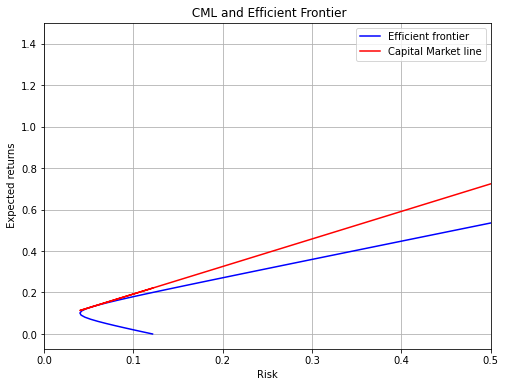

In [99]:
fig2 = plt.figure(figsize=(8,6))

plt.plot(Sigma(RH),RH,'b-')
plt.plot(Sigma(RH),R_bar,'r-')

plt.title(' CML and Efficient Frontier')
plt.legend(['Efficient frontier','Capital Market line'])

plt.xlim(0,0.5)
plt.xlabel("Risk")
plt.ylabel(" Expected returns")



plt.grid()

plt.show()

# Exercise 4

In [90]:
def VaR(Position,mean,sigma,CI):
    return Position-Position*(scipy.stats.norm.ppf(1-CI,mean,sigma)+1)

In [93]:
Netflix = reader.get_data_yahoo("NFLX",start="2017-01-01"
                                ,end="2020-01-01")['Adj Close']

returns =  Netflix.pct_change()

mean = returns.mean()
sigma = returns.std()
Position = 1000 #1000 USD
CI = 0.95

VAR = VaR(Position,mean,sigma,CI)

print(" The mean for Netflix is : %f USD" % mean)
print(" The Variance for Netflix is : %f" % sigma**(2))
print(" The Value at Risk is : %0.2f USD" % VAR)

 The mean for Netflix is : 0.001509 USD
 The Variance for Netflix is : 0.000545
 The Value at Risk is : 36.90 USD
